<a href="https://colab.research.google.com/github/RahmadHadhiWicaksono/Kuliah/blob/main/K_NN_data_tenaga_kesejahteraan_sosial_masyarakat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
dataset = pd.read_csv('data-tenaga-kesejahteraan-sosial-masyarakat.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [46]:
print(x)

[[  25 3000]
 [  30 2500]
 [  35 5000]
 [  33 5500]
 [  21 3050]
 [  26 5500]
 [  28 2500]
 [  27 5500]
 [  24 5500]
 [  26 3050]
 [  23 2500]
 [  31 5000]
 [  33 5500]
 [  36 2500]
 [  41 3050]
 [  51 5500]
 [  22 2500]
 [  41 5500]
 [  44 5000]
 [  39 5500]
 [  36 2500]
 [  33 3050]
 [  37 5500]
 [  34 5000]
 [  31 5500]
 [  28 2500]
 [  29 3050]
 [  26 5000]
 [  25 5500]
 [  24 3050]
 [  50 5500]
 [  27 3050]
 [  25 2500]
 [  41 5500]
 [  44 5000]
 [  39 5500]
 [  36 3050]
 [  33 3050]
 [  37 5500]
 [  34 2500]
 [  24 3050]
 [  26 2500]
 [  23 5000]
 [  31 3050]]


In [47]:
print (y)

[1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 1]


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [49]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'hamming', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [51]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
y_pred = classifier.predict(x_test)

In [53]:
print (x_test)

[[ 2.60783035  1.23392725]
 [ 0.44043357 -0.74549772]
 [-0.45202393  0.82996297]
 [-1.08949357 -0.74549772]
 [-0.83450571 -1.18985842]
 [-0.19703607 -1.18985842]
 [-0.57951786  1.23392725]
 [ 0.18544571  0.82996297]
 [ 0.95040928  1.23392725]
 [-0.32453    -0.74549772]
 [-0.70701178 -0.74549772]]


In [54]:
print (y_test)

[1 0 1 1 1 0 1 1 1 0 1]


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 3]
 [0 8]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


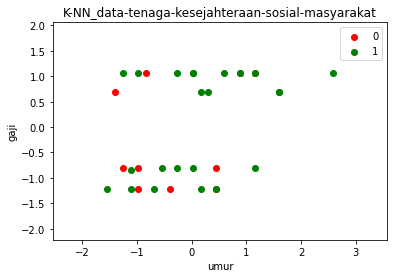

In [56]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contour(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter (x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN_data-tenaga-kesejahteraan-sosial-masyarakat')
plt.xlabel('umur')
plt.ylabel('gaji')
plt.legend()
plt.show()